# Data Fetching and preprocessing

In [2]:
!git clone https://github.com/spMohanty/PlantVillage-Dataset

Cloning into 'PlantVillage-Dataset'...
remote: Enumerating objects: 163229, done.
remote: Total 163229 (delta 0), reused 0 (delta 0), pack-reused 163229
Receiving objects: 100% (163229/163229), 2.00 GiB | 22.38 MiB/s, done.
Resolving deltas: 100% (99/99), done.
Updating files: 100% (182401/182401), done.


In [3]:
!mv /content/PlantVillage-Dataset/raw /content

In [4]:
!rm -r /content/PlantVillage-Dataset

In [ ]:
import os

# Specify your destination directory
destination = "/content/raw/color"

# Get all directories in the destination and sort them alphabetically
directories = [d for d in os.listdir(destination) if os.path.isdir(os.path.join(destination, d))]
directories.sort()

# Print all directories and their respective file counts
for directory in directories:
    dir_path = os.path.join(destination, directory)
    files = [f for f in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, f))]
    print(f"{directory} - Number of files: {len(files)}")


Apple___Apple_scab - Number of files: 630
Apple___Black_rot - Number of files: 621
Apple___Cedar_apple_rust - Number of files: 275
Apple___healthy - Number of files: 1645
Blueberry___healthy - Number of files: 1502
Cherry_(including_sour)___Powdery_mildew - Number of files: 1052
Cherry_(including_sour)___healthy - Number of files: 854
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot - Number of files: 513
Corn_(maize)___Common_rust_ - Number of files: 1192
Corn_(maize)___Northern_Leaf_Blight - Number of files: 985
Corn_(maize)___healthy - Number of files: 1162
Grape___Black_rot - Number of files: 1180
Grape___Esca_(Black_Measles) - Number of files: 1383
Grape___Leaf_blight_(Isariopsis_Leaf_Spot) - Number of files: 1076
Grape___healthy - Number of files: 423
Orange___Haunglongbing_(Citrus_greening) - Number of files: 5507
Peach___Bacterial_spot - Number of files: 2297
Peach___healthy - Number of files: 360
Pepper,_bell___Bacterial_spot - Number of files: 997
Pepper,_bell___healthy - N

# Yolo V8 leaf detection

---



---



In [8]:
!pip install --upgrade tensorflow-probability


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 19.3 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-probability
    Found existing installation: tensorflow-probability 0.22.0
    Uninstalling tensorflow-probability-0.22.0:
      Successfully uninstalled tensorflow-probability-0.22.0


In [9]:
!pip show typing_extensions


Name: typing_extensions
Version: 4.5.0
Summary: Backported and Experimental Type Hints for Python 3.7+
Home-page: 
Author: 
Author-email: "Guido van Rossum, Jukka Lehtosalo, Łukasz Langa, Michael Lee" <levkivskyi@gmail.com>
License: 
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: arviz, chex, flax, google-generativeai, huggingface-hub, ibis-framework, inflect, librosa, orbax-checkpoint, panel, polars, pydantic, pymc, pytensor, python-utils, qudida, SQLAlchemy, tensorflow, torch, typer


In [ ]:
!pip show tensorflow-probability


Name: tensorflow-probability
Version: 0.23.0
Summary: Probabilistic modeling and statistical inference in TensorFlow
Home-page: http://github.com/tensorflow/probability
Author: Google LLC
Author-email: no-reply@google.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, cloudpickle, decorator, dm-tree, gast, numpy, six
Required-by: dopamine-rl


In [11]:
!pip install --upgrade ultralytics ultralyticsplus

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 699.7/699.7 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 699.1/699.1 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 MB 10.2 MB/s

In [12]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from ultralyticsplus import YOLO
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the path to your data
data_path = "/content/raw/color"

# Create an ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Create a training set generator
train_generator = datagen.flow_from_directory(
    data_path,
    target_size=(256, 256),  # Adjust this to your desired image size
    batch_size=32,
    class_mode='categorical',
    subset='training')

# Create a validation set generator
validation_generator = datagen.flow_from_directory(
    data_path,
    target_size=(256, 256),  # Adjust this to your desired image size
    batch_size=32,
    class_mode='categorical',
    subset='validation')

# Example usage of the generators
images, labels = next(train_generator)
print(f'Shape of images batch: {images.shape}')
print(f'Shape of labels batch: {labels.shape}')


Found 43456 images belonging to 38 classes.
Found 10849 images belonging to 38 classes.
Shape of images batch: (32, 256, 256, 3)
Shape of labels batch: (32, 38)


In [ ]:
!pip show ultralytics ultralyticsplus

Name: ultralytics
Version: 8.0.239
Summary: Ultralytics YOLOv8 for SOTA object detection, multi-object tracking, instance segmentation, pose estimation and image classification.
Home-page: 
Author: Glenn Jocher, Ayush Chaurasia, Jing Qiu
Author-email: 
License: AGPL-3.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: hub-sdk, matplotlib, numpy, opencv-python, pandas, pillow, psutil, py-cpuinfo, pyyaml, requests, scipy, seaborn, thop, torch, torchvision, tqdm
Required-by: ultralyticsplus
---
Name: ultralyticsplus
Version: 0.0.29
Summary: HuggingFace utilities for Ultralytics/YOLOv8.
Home-page: 
Author: 
Author-email: 
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: fire, huggingface-hub, pandas, protobuf, roboflow, sahi, ultralytics
Required-by: 


In [ ]:
!wget -O best.pt https://huggingface.co/foduucom/plant-leaf-detection-and-classification/resolve/main/best.pt?download=true

--2024-01-17 08:52:03--  https://huggingface.co/foduucom/plant-leaf-detection-and-classification/resolve/main/best.pt?download=true
Resolving huggingface.co (huggingface.co)... 3.163.189.74, 3.163.189.114, 3.163.189.90, ...
Connecting to huggingface.co (huggingface.co)|3.163.189.74|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/repos/0b/a2/0ba2f7baf2fcbafdae9ca76a056e20269a502cb4f3d5678248d0d857cafa31b1/eaedbb5c34b0c772c608dca209c511d15b1fa42eb05914e2346214f984a1d290?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27best.pt%3B+filename%3D%22best.pt%22%3B&Expires=1705740723&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcwNTc0MDcyM319LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZS5jby9yZXBvcy8wYi9hMi8wYmEyZjdiYWYyZmNiYWZkYWU5Y2E3NmEwNTZlMjAyNjlhNTAyY2I0ZjNkNTY3ODI0OGQwZDg1N2NhZmEzMWIxL2VhZWRiYjVjMzRiMGM3NzJjNjA4ZGNhMjA5YzUxMWQxNWIxZmE0MmViMDU5MTRlMjM0NjIxNGY5OD

In [ ]:
import logging
import os
from pathlib import Path
import numpy as np
from PIL import Image
from sahi.prediction import ObjectPrediction, PredictionScore
from sahi.utils.cv import (
    get_bool_mask_from_coco_segmentation,
    read_image_as_pil,
    visualize_object_predictions,
)

def render_result(
    image,
    model: YOLO,
    result: "ultralytics.engine.result.Result",
    rect_th: int = 2,
    text_th: int = 1,
) -> Image.Image:

    if model.overrides["task"] not in ["detect", "segment"]:
        raise ValueError(
            f"Model task must be either 'detect' or 'segment'. Got {model.overrides['task']}"
        )

    image = read_image_as_pil(image)
    np_image = np.ascontiguousarray(image)

    names = model.model.names

    masks = result.masks
    boxes = result.boxes

    object_predictions = []
    if boxes is not None:
        det_ind = 0
        for xyxy, conf, cls in zip(boxes.xyxy, boxes.conf, boxes.cls):
            if masks:
                img_height = np_image.shape[0]
                img_width = np_image.shape[1]
                segments = masks.xyn
                segments = segments[det_ind]  # segments: np.array([[x1, y1], [x2, y2]])
                # convert segments into full shape
                segments[:, 0] = segments[:, 0] * img_width
                segments[:, 1] = segments[:, 1] * img_height
                segmentation = [segments.ravel().tolist()]

                bool_mask = get_bool_mask_from_coco_segmentation(
                    segmentation, width=img_width, height=img_height
                )
                if sum(sum(bool_mask == 1)) <= 2:
                    continue
                object_prediction = ObjectPrediction.from_coco_segmentation(
                    segmentation=segmentation,
                    category_name=names[int(cls)],
                    category_id=int(cls),
                    full_shape=[img_height, img_width],
                )
                object_prediction.score = PredictionScore(value=conf)
            else:
                object_prediction = ObjectPrediction(
                    bbox=xyxy.tolist(),
                    category_name=names[int(cls)],
                    category_id=int(cls),
                    score=conf,
                )
            object_predictions.append(object_prediction)
            det_ind += 1

    result = visualize_object_predictions(
        image=np_image,
        object_prediction_list=object_predictions,
        rect_th=rect_th,
        text_th=text_th,
    )

    return Image.fromarray(result["image"])


In [ ]:
from ultralyticsplus import YOLO
#, render_result

# load model
model = YOLO('/content/best.pt')

# set model parameters
model.overrides['conf'] = 0.25  # NMS confidence threshold
model.overrides['iou'] = 0.45  # NMS IoU threshold
model.overrides['agnostic_nms'] = False  # NMS class-agnostic
model.overrides['max_det'] = 10  # maximum number of detections per image


# set image
image = '/content/istockphoto-1319493016-640x640.jpg'

# perform inference
results = model.predict(image)

# observe results
print(results[0].boxes)
render = render_result(model=model, image=image, result=results[0])
render.show()



image 1/1 /content/istockphoto-1319493016-640x640.jpg: 384x640 1 raspberry, 3 cherrys, 598.8ms
Speed: 1.9ms preprocess, 598.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([26., 26., 26.,  8.])
conf: tensor([0.8821, 0.7895, 0.3846, 0.3327])
data: tensor([[3.1977e+02, 9.3217e+01, 4.6115e+02, 3.0889e+02, 8.8209e-01, 2.6000e+01],
        [2.3299e+02, 1.9400e-01, 3.5384e+02, 1.3637e+02, 7.8946e-01, 2.6000e+01],
        [4.2663e+02, 5.8438e-01, 5.5467e+02, 1.1767e+02, 3.8459e-01, 2.6000e+01],
        [6.3678e+01, 1.0560e+02, 1.7334e+02, 2.2137e+02, 3.3269e-01, 8.0000e+00]])
id: None
is_track: False
orig_shape: (360, 640)
shape: torch.Size([4, 6])
xywh: tensor([[390.4573, 201.0523, 141.3790, 215.6696],
        [293.4160,  68.2817, 120.8567, 136.1754],
        [490.6479,  59.1291, 128.0371, 117.0894],
        [118.5068, 163.4847, 109.6569, 115.7625]])
xywhn: tensor([[0.6101, 0.5585, 0.2209, 0.5991],
  

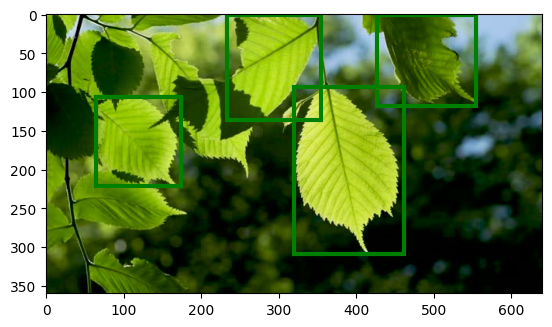

In [ ]:

    # Get bounding box coordinates
    xyxy = results[0].boxes.xyxy.cpu().numpy()

    # Load the input image using PIL
    input_image = Image.open(image)

    # Plot the input image
    plt.imshow(input_image)

    # Add bounding boxes to the plot
    for bbox in xyxy:
        x_min, y_min, x_max, y_max = bbox
        rect = Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=3, edgecolor="g", facecolor="none")
        plt.gca().add_patch(rect)

    # Show the plot
    plt.show()


image 1/1 /content/raw/color/Apple___Apple_scab/36d99a07-4a43-4416-b204-6886f71d5039___FREC_Scab 3294.JPG: 640x640 1 apple, 1133.1ms
Speed: 16.0ms preprocess, 1133.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([28.])
conf: tensor([0.9270])
data: tensor([[ 15.2226,   0.8807, 255.8720, 255.5206,   0.9270,  28.0000]])
id: None
is_track: False
orig_shape: (256, 256)
shape: torch.Size([1, 6])
xywh: tensor([[135.5473, 128.2007, 240.6495, 254.6398]])
xywhn: tensor([[0.5295, 0.5008, 0.9400, 0.9947]])
xyxy: tensor([[ 15.2226,   0.8807, 255.8720, 255.5206]])
xyxyn: tensor([[0.0595, 0.0034, 0.9995, 0.9981]])


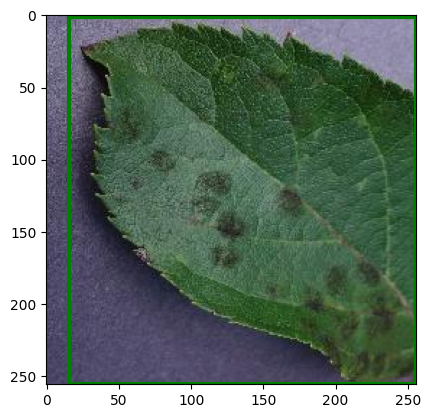


image 1/1 /content/raw/color/Apple___Apple_scab/37659856-0fc8-430b-871a-af4f0b557e49___FREC_Scab 3081.JPG: 640x640 1 apple, 1201.0ms
Speed: 12.5ms preprocess, 1201.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([28.])
conf: tensor([0.8672])
data: tensor([[7.1094e-02, 5.4628e+00, 2.4969e+02, 2.5600e+02, 8.6720e-01, 2.8000e+01]])
id: None
is_track: False
orig_shape: (256, 256)
shape: torch.Size([1, 6])
xywh: tensor([[124.8828, 130.7314, 249.6235, 250.5372]])
xywhn: tensor([[0.4878, 0.5107, 0.9751, 0.9787]])
xyxy: tensor([[7.1094e-02, 5.4628e+00, 2.4969e+02, 2.5600e+02]])
xyxyn: tensor([[2.7771e-04, 2.1339e-02, 9.7537e-01, 1.0000e+00]])


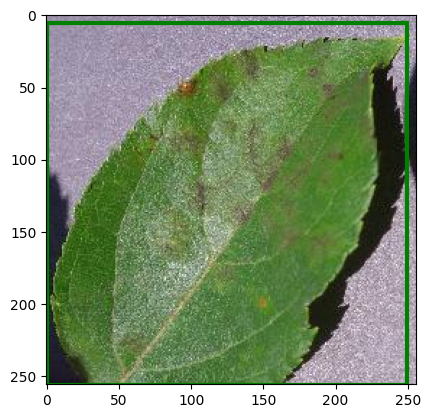


image 1/1 /content/raw/color/Apple___Apple_scab/376aaef3-8649-43aa-89f8-166bd349a3d3___FREC_Scab 3064.JPG: 640x640 1 apple, 867.7ms
Speed: 4.2ms preprocess, 867.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([28.])
conf: tensor([0.8681])
data: tensor([[  0.0000,  30.8817, 255.3813, 256.0000,   0.8681,  28.0000]])
id: None
is_track: False
orig_shape: (256, 256)
shape: torch.Size([1, 6])
xywh: tensor([[127.6906, 143.4409, 255.3813, 225.1183]])
xywhn: tensor([[0.4988, 0.5603, 0.9976, 0.8794]])
xyxy: tensor([[  0.0000,  30.8817, 255.3813, 256.0000]])
xyxyn: tensor([[0.0000, 0.1206, 0.9976, 1.0000]])


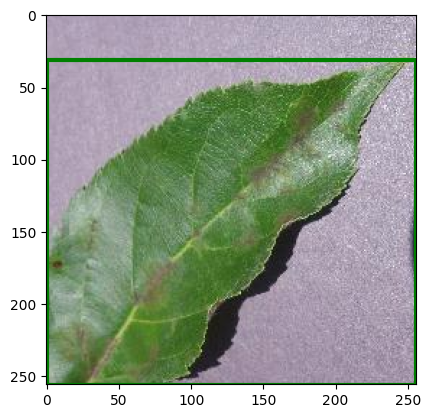


image 1/1 /content/raw/color/Apple___Apple_scab/38e76f0a-63cb-460a-b0fa-f20e561dc2c0___FREC_Scab 3481.JPG: 640x640 1 Blueberry, 574.8ms
Speed: 4.1ms preprocess, 574.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([14.])
conf: tensor([0.7787])
data: tensor([[  0.4168,   0.3214, 239.4739, 256.0000,   0.7787,  14.0000]])
id: None
is_track: False
orig_shape: (256, 256)
shape: torch.Size([1, 6])
xywh: tensor([[119.9453, 128.1607, 239.0571, 255.6786]])
xywhn: tensor([[0.4685, 0.5006, 0.9338, 0.9987]])
xyxy: tensor([[  0.4168,   0.3214, 239.4739, 256.0000]])
xyxyn: tensor([[0.0016, 0.0013, 0.9354, 1.0000]])


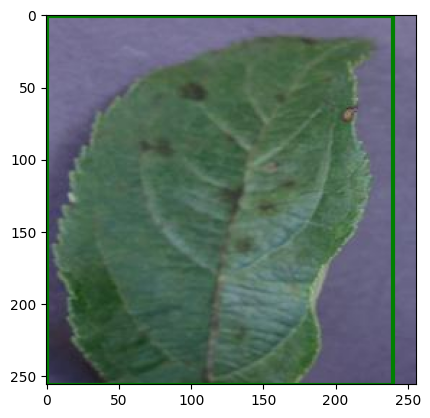


image 1/1 /content/raw/color/Apple___Apple_scab/3bf2f5f8-4578-405a-88c6-c5338620a078___FREC_Scab 3059.JPG: 640x640 1 peach, 570.1ms
Speed: 6.9ms preprocess, 570.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([33.])
conf: tensor([0.8117])
data: tensor([[  0.0000,   2.1313, 255.2780, 255.3186,   0.8117,  33.0000]])
id: None
is_track: False
orig_shape: (256, 256)
shape: torch.Size([1, 6])
xywh: tensor([[127.6390, 128.7250, 255.2780, 253.1873]])
xywhn: tensor([[0.4986, 0.5028, 0.9972, 0.9890]])
xyxy: tensor([[  0.0000,   2.1313, 255.2780, 255.3186]])
xyxyn: tensor([[0.0000, 0.0083, 0.9972, 0.9973]])


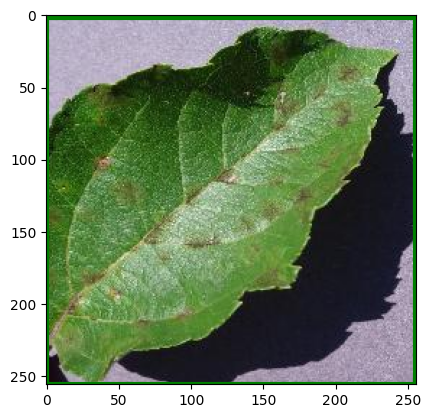

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image


# Set the path to your data
data_path = "/content/raw/color"
output_dir = "/content/output"

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)


# Example usage of the generators
for i in range(min(len(train_generator), 5)):
#for i in range(len(train_generator)):
    images, labels = train_generator[i]
    image_path = train_generator.filepaths[i]

    # Example YOLO prediction and saving the image
    model = YOLO('/content/best.pt')
    # set model parameters
    model.overrides['conf'] = 0.50  # NMS confidence threshold
    model.overrides['iou'] = 0.45  # NMS IoU threshold
    model.overrides['agnostic_nms'] = False  # NMS class-agnostic
    model.overrides['max_det'] = 1  # maximum number of detections per image

    results = model.predict(image_path)

    # observe results
    print(results[0].boxes)

    # Get bounding box coordinates
    xyxy = results[0].boxes.xyxy.cpu().numpy()

    # Load the input image using PIL
    input_image = Image.open(image_path)

    # Plot the input image
    plt.imshow(input_image)

    # Add bounding boxes to the plot
    for bbox in xyxy:
        x_min, y_min, x_max, y_max = bbox
        rect = Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=3, edgecolor="g", facecolor="none")
        plt.gca().add_patch(rect)

    # Show the plot
    plt.show()

# Data Loading and segmentation

In [19]:
from tensorflow.keras.utils import normalize
import os
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.optimizers import Adam
import glob

In [20]:
image_directory = '/content/raw/color/Apple___healthy/'
mask_directory = '/content/raw/segmented/Apple___healthy/'

In [21]:
SIZE = 256
num_images = 100

Load images and masks in order so they match

In [22]:
image_names = glob.glob("/content/raw/color/Apple___healthy/*.JPG")
image_names.sort()
image_names_subset = image_names[0:num_images]
images = [cv2.imread(img, 1) for img in image_names_subset]
images_rgb = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in images]
image_dataset = np.array(images_rgb)
#image_dataset = np.expand_dims(image_dataset, axis = 3)

In [23]:
image_dataset = image_dataset.astype(np.uint8)


In [24]:
print(image_dataset.dtype)

uint8


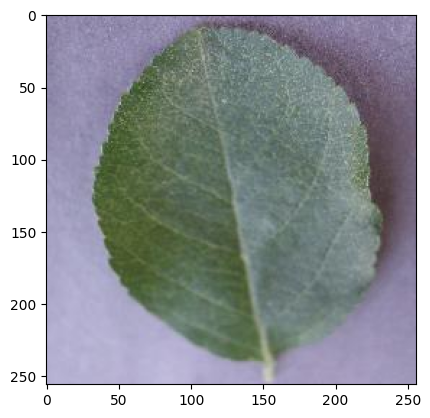

In [25]:
import matplotlib.pyplot as plt

# Display a sample image
plt.imshow(image_dataset[3])
plt.show()

Read masks the same way.

In [26]:
mask_names = glob.glob("/content/raw/segmented/Apple___healthy/*.jpg")
mask_names.sort()
mask_names_subset = mask_names[0:num_images]
masks = [cv2.imread(mask, 0) for mask in mask_names_subset]
#masks_rgb = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in masks]
N_mask_dataset = np.array(masks)
mask_dataset = np.array(masks)
mask_dataset[mask_dataset >= 10] = 255
mask_dataset[mask_dataset < 10] = 0


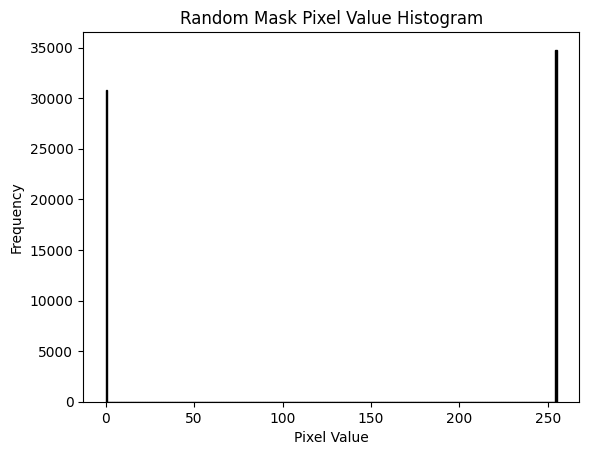

In [27]:
import matplotlib.pyplot as plt
import random

# Select a random image index
random_index = random.randint(0, num_images - 1)
random_mask = mask_dataset[random_index, :, :]

# Flatten the image to a 1D array
mask_flat = random_mask.flatten()

# Plot the histogram
plt.hist(mask_flat, bins=256, color='black', edgecolor='black')
plt.title("Random Mask Pixel Value Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()


Pixel value: 0, Count: 27355
Pixel value: 255, Count: 38181


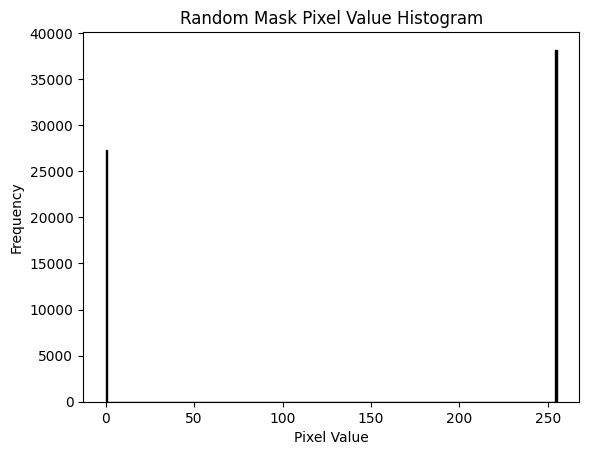

In [28]:
# Select a random image index
random_index = random.randint(0, num_images - 1)
random_mask = mask_dataset[random_index, :, :]

# Count the occurrences of each pixel value
pixel_values, pixel_counts = np.unique(random_mask, return_counts=True)

# Display the counts
for value, count in zip(pixel_values, pixel_counts):
    print(f"Pixel value: {value}, Count: {count}")

# Plot the histogram
plt.hist(random_mask.flatten(), bins=256, color='black', edgecolor='black')
plt.title("Random Mask Pixel Value Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

In [29]:
print("Mask data type is:", mask_dataset.dtype)


Mask data type is: uint8


In [30]:
print("Image data shape is: ", image_dataset.shape)
print("Mask data shape is: ", mask_dataset.shape)
print("Max pixel value in image is: ", image_dataset.max())
print("Labels in the mask are : ", np.unique(mask_dataset))

Image data shape is:  (100, 256, 256, 3)
Mask data shape is:  (100, 256, 256)
Max pixel value in image is:  255
Labels in the mask are :  [  0 255]


In [31]:
print("Mask data shape is: ", mask_dataset.shape)


Mask data shape is:  (100, 256, 256)


In [32]:
#Normalize images
image_dataset = image_dataset /255.  #Can also normalize or scale using MinMax scaler
#Do not normalize masks, just rescale to 0 to 1.
mask_dataset = mask_dataset /255.  #PIxel values will be 0 or 1

In [33]:
print("Labels in the mask are : ", np.unique(mask_dataset))

Labels in the mask are :  [          0           1]


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size = 0.20, random_state = 42)


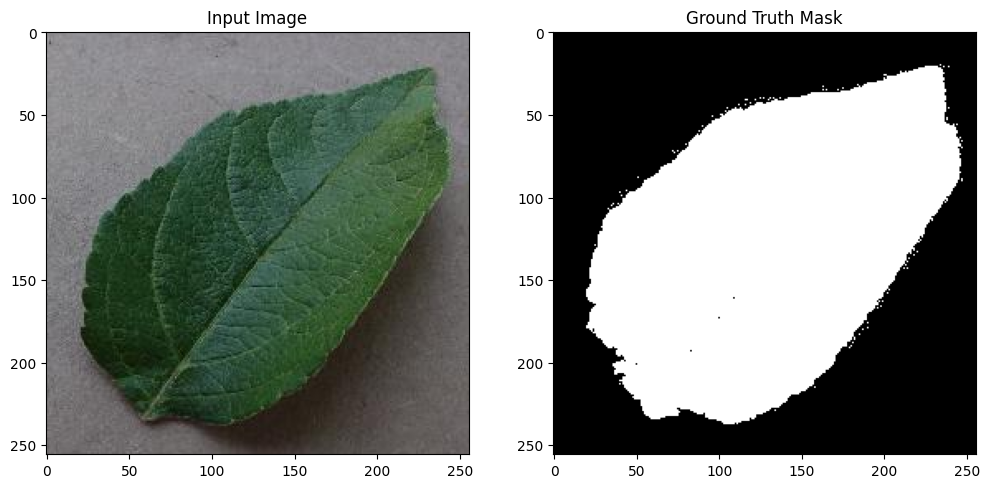

Labels in the mask are :  [          0           1]


In [35]:
import random

image_number = random.randint(0, len(X_train) - 1)
plt.figure(figsize=(12, 6))

# Display input image
plt.subplot(121)
plt.imshow(X_train[image_number, :, :, :])
plt.title("Input Image")

# Display ground truth mask
plt.subplot(122)
plt.imshow(y_train[image_number, :, :,], cmap='gray')  # Set colormap to grayscale
plt.title("Ground Truth Mask")

plt.show()

print("Labels in the mask are : ", np.unique(y_train[image_number, :, :]))

# DeepLabV3+ Model

---


---



Data Load and Augmentation

In [36]:
import os
import numpy as np
import cv2
from glob import glob
from tqdm.auto import tqdm
from sklearn.model_selection import train_test_split
from albumentations import HorizontalFlip, GridDistortion, OpticalDistortion, ChannelShuffle, CoarseDropout, CenterCrop, Crop, Rotate

In [37]:
import os
import shutil
import cv2
import numpy as np
from tqdm.auto import tqdm
import imageio


def copy_images_and_masks(input_image_dir, mask_dir, output_dir, threshold=10):
    # Create the output directories if they don't exist
    output_image_dir = os.path.join(output_dir, "images")
    output_mask_dir = os.path.join(output_dir, "masks")
    os.makedirs(output_image_dir, exist_ok=True)
    os.makedirs(output_mask_dir, exist_ok=True)
    #count = 0

    # Copy images
    image_files = [f for f in tqdm(os.listdir(input_image_dir), dynamic_ncols=True) if os.path.isfile(os.path.join(input_image_dir, f))]
    for image_file in image_files:
        shutil.copy(os.path.join(input_image_dir, image_file), os.path.join(output_image_dir, image_file))
        #print(image_file)

    # Copy and threshold masks
    mask_files = [f for f in tqdm(os.listdir(mask_dir), dynamic_ncols=True) if os.path.isfile(os.path.join(mask_dir, f))]
    for mask_file in mask_files:
        new_mask_name = mask_file.replace("_final_masked", "")
        shutil.copy(os.path.join(mask_dir, mask_file), os.path.join(output_mask_dir, new_mask_name))


# Example usage:
input_image_directory = "/content/raw/color/Apple___healthy"
mask_directory = "/content/raw/segmented/Apple___healthy"
output_directory = "/content/data"
# thresh = 2
copy_images_and_masks(input_image_directory, mask_directory, output_directory, threshold=10)


  0%|          | 0/1645 [00:00<?, ?it/s]

  0%|          | 0/1645 [00:00<?, ?it/s]

In [38]:
image = imageio.imread_v2("/content/data/masks/08aaa4e8-ed92-49d3-9ac3-1f6c59740017___RS_HL 7701.jpg")
#image = image.astype(np.float32)
#image = image /255
#image = image.astype(np.float32)

print("Image data shape is: ", image.shape)
print("Max pixel value in image is: ", image.max())
#print("Labels in the image are : ", np.unique(image))
print("Image data type: ", image.dtype)
#print("Labels in the image and their counts are : ", dict(zip(*np.unique(image, return_counts=True))))


# image = image*255
# image_rgb = [cv2.cvtColor(image, cv2.COLOR_BGR2RGB)]
# from google.colab.patches import cv2_imshow
# cv2_imshow(image_rgb)

Image data shape is:  (256, 256, 3)
Max pixel value in image is:  232
Image data type:  uint8


Image data shape is:  (256, 256, 3)
Max pixel value in image is:  255
Labels in the image are :  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78
  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 

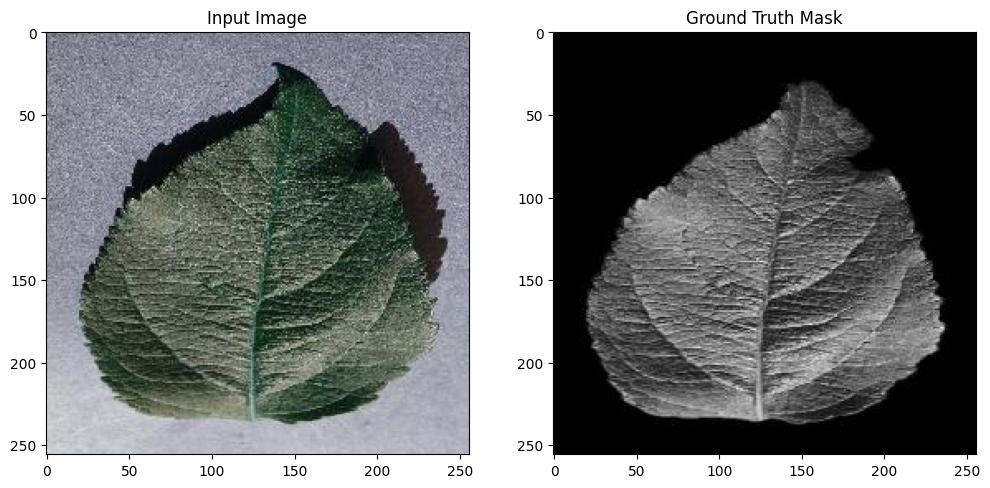

In [39]:
import matplotlib.pyplot as plt

mask = cv2.imread("/content/data/masks/00907d8b-6ae6-4306-bfd7-d54471981a86___RS_HL 5709.jpg",0)
image = cv2.imread("/content/data/images/00907d8b-6ae6-4306-bfd7-d54471981a86___RS_HL 5709.JPG",1)
#image = image*255
#mask = mask*255

print("Image data shape is: ", image.shape)
print("Max pixel value in image is: ", image.max())
print("Labels in the image are : ", np.unique(image))
print("Image data type: ", image.dtype)

print("mask data shape is: ", mask.shape)
print("Max pixel value in mask is: ", mask.max())
print("Labels in the mask are : ", np.unique(mask))
print("mask data type: ", mask.dtype)

plt.figure(figsize=(12, 6))

# Display input image
plt.subplot(121)
plt.imshow(image)
plt.title("Input Image")

# Display ground truth mask
plt.subplot(122)
plt.imshow(mask, cmap='gray')  # Set colormap to grayscale
plt.title("Ground Truth Mask")

plt.show()


(256, 256, 3)


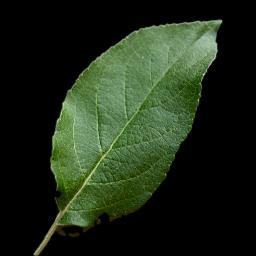

uint8
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78
  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 219 220 222 228 229 231 232]


In [40]:
img = cv2.imread("/content/data/masks/08aaa4e8-ed92-49d3-9ac3-1f6c59740017___RS_HL 7701.jpg")

print(img.shape)
from google.colab.patches import cv2_imshow
cv2_imshow(img)
print(img.dtype)
print(np.unique(img))



---



In [41]:
def augment_data(images, masks, save_path, augment=True):
    H = 256
    W = 256

    for x, y in tqdm(zip(images, masks), total=len(images)):
        name = x.split("/")[-1].split(".")[0]

        # Reading the image and mask
        x = cv2.imread(x, cv2.IMREAD_COLOR)
        y = cv2.imread(y, cv2.IMREAD_COLOR)


        # Augmentation
        if augment == True:
            aug = HorizontalFlip(p=1.0)
            augmented = aug(image=x, mask=y)
            x1 = augmented["image"]
            y1 = augmented["mask"]

            x2 = cv2.cvtColor(x, cv2.COLOR_RGB2GRAY)
            y2 = y

            aug = ChannelShuffle(p=1)
            augmented = aug(image=x, mask=y)
            x3 = augmented['image']
            y3 = augmented['mask']

            aug = CoarseDropout(p=1, min_holes=3, max_holes=10, max_height=32, max_width=32)
            augmented = aug(image=x, mask=y)
            x4 = augmented['image']
            y4 = augmented['mask']

            aug = Rotate(limit=45, p=1.0)
            augmented = aug(image=x, mask=y)
            x5 = augmented["image"]
            y5 = augmented["mask"]

            X = [x, x1, x2, x3, x4, x5]
            Y = [y, y1, y2, y3, y4, y5]

        else:
            X = [x]
            Y = [y]

        index = 0
        for i, m in zip(X, Y):
            try:
                # Center Cropping
                aug = CenterCrop(H, W, p=1.0)
                augmented = aug(image=i, mask=m)
                i = augmented["image"]
                m = augmented["mask"]

            except Exception as e:
                i = cv2.resize(i, (W, H))
                m = cv2.resize(m, (W, H))


            tmp_image_name = f"{name}_{index}.png"
            tmp_mask_name = f"{name}_{index}.png"

            image_path = os.path.join(save_path, "image", tmp_image_name)
            mask_path = os.path.join(save_path, "mask", tmp_mask_name)

            cv2.imwrite(image_path, i)
            cv2.imwrite(mask_path, m)

            index += 1

In [43]:
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

def load_data(path, split):
    # Loading the images and masks
    X = sorted(glob(os.path.join(path, "images", "*.JPG")))
    Y = sorted(glob(os.path.join(path, "masks", "*.jpg")))

    # Spliting the data into training and testing
    split_size = split
    print("split size is",int(split_size*100),"% of",len(X))

    train_x, test_x = train_test_split(X, test_size=split_size, random_state=42)
    train_y, test_y = train_test_split(Y, test_size=split_size, random_state=42)

    return (train_x, train_y), (test_x, test_y)

In [44]:
if __name__ == "__main__":
    np.random.seed(42)

    # Load the dataset
    data_path = "/content/data"
    split = 0.1
    (train_x, train_y), (test_x, test_y) = load_data(data_path,split)

    print(f"Train:\t {len(train_x)} - {len(train_y)}")
    print(f"Test:\t {len(test_x)} - {len(test_y)}")

    """ Create directories to save the augmented data """
    create_dir("new_data/train/image/")
    create_dir("new_data/train/mask/")
    create_dir("new_data/test/image/")
    create_dir("new_data/test/mask/")

    """ Data augmentation """
    augment_data(train_x, train_y, "new_data/train/", augment=True)
    augment_data(test_x, test_y, "new_data/test/", augment=False)

split size is 10 % of 1645
Train:	 1480 - 1480
Test:	 165 - 165


  0%|          | 0/1480 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

Model

In [45]:
#Metrics
import numpy as np
import tensorflow as tf
from tensorflow.keras import backend as K

def iou(y_true, y_pred):
    def f(y_true, y_pred):
        intersection = (y_true * y_pred).sum()
        union = y_true.sum() + y_pred.sum() - intersection
        x = (intersection + 1e-15) / (union + 1e-15)
        x = x.astype(np.float32)
        return x
    return tf.numpy_function(f, [y_true, y_pred], tf.float32)

smooth = 1e-15
def dice_coef(y_true, y_pred):
    y_true = tf.keras.layers.Flatten()(y_true)
    y_pred = tf.keras.layers.Flatten()(y_pred)
    intersection = tf.reduce_sum(y_true * y_pred)
    return (2. * intersection + smooth) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) + smooth)

def dice_loss(y_true, y_pred):
    return 1.0 - dice_coef(y_true, y_pred)

In [46]:
import os
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input
from tensorflow.keras.layers import AveragePooling2D, GlobalAveragePooling2D, UpSampling2D, Reshape, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50
import tensorflow as tf

def SqueezeAndExcite(inputs, ratio=8):
    init = inputs
    filters = init.shape[-1]
    se_shape = (1, 1, filters)

    se = GlobalAveragePooling2D()(init)
    se = Reshape(se_shape)(se)
    se = Dense(filters // ratio, activation='relu', kernel_initializer='he_normal', use_bias=False)(se)
    se = Dense(filters, activation='sigmoid', kernel_initializer='he_normal', use_bias=False)(se)
    x = init * se
    return x

def ASPP(inputs):
    shape = inputs.shape
    y1 = AveragePooling2D(pool_size=(shape[1], shape[2]))(inputs)
    y1 = Conv2D(256, 1, padding="same", use_bias=False)(y1)
    y1 = BatchNormalization()(y1)
    y1 = Activation("relu")(y1)
    y1 = UpSampling2D((shape[1], shape[2]), interpolation="bilinear")(y1)

    y2 = Conv2D(256, 1, padding="same", use_bias=False)(inputs)
    y2 = BatchNormalization()(y2)
    y2 = Activation("relu")(y2)

    y3 = Conv2D(256, 3, padding="same", use_bias=False, dilation_rate=6)(inputs)
    y3 = BatchNormalization()(y3)
    y3 = Activation("relu")(y3)

    y4 = Conv2D(256, 3, padding="same", use_bias=False, dilation_rate=12)(inputs)
    y4 = BatchNormalization()(y4)
    y4 = Activation("relu")(y4)

    y5 = Conv2D(256, 3, padding="same", use_bias=False, dilation_rate=18)(inputs)
    y5 = BatchNormalization()(y5)
    y5 = Activation("relu")(y5)

    y = Concatenate()([y1, y2, y3, y4, y5])
    y = Conv2D(256, 1, padding="same", use_bias=False)(y)
    y = BatchNormalization()(y)
    y = Activation("relu")(y)

    return y

def deeplabv3_plus(shape):
    # Input
    inputs = Input(shape)

    # Encoder
    encoder = ResNet50(weights="imagenet", include_top=False, input_tensor=inputs)

    image_features = encoder.get_layer("conv4_block6_out").output
    x_a = ASPP(image_features)
    x_a = UpSampling2D((4, 4), interpolation="bilinear")(x_a)

    x_b = encoder.get_layer("conv2_block2_out").output
    x_b = Conv2D(filters=48, kernel_size=1, padding='same', use_bias=False)(x_b)
    x_b = BatchNormalization()(x_b)
    x_b = Activation('relu')(x_b)

    x = Concatenate()([x_a, x_b])
    x = SqueezeAndExcite(x)

    x = Conv2D(filters=256, kernel_size=3, padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters=256, kernel_size=3, padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = SqueezeAndExcite(x)

    x = UpSampling2D((4, 4), interpolation="bilinear")(x)
    x = Conv2D(1, 1)(x)
    x = Activation("sigmoid")(x)

    model = Model(inputs, x)
    return model

if __name__ == "__main__":
    model = deeplabv3_plus((256, 256, 3))

94765736/94765736 [==============================] - 1s 0us/step




---



In [47]:
#Train
import os
import numpy as np
import cv2
from glob import glob
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, ReduceLROnPlateau, EarlyStopping, TensorBoard
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Recall, Precision

H = 256
W = 256

In [48]:

def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

def shuffling(x, y):
    x, y = shuffle(x, y, random_state=42)
    return x, y

def load_data(path):
    x = sorted(glob(os.path.join(path, "image", "*png")))
    y = sorted(glob(os.path.join(path, "mask", "*png")))
    return x, y

def read_image(path):
    path = path.decode()
    x = cv2.imread(path, cv2.IMREAD_COLOR)
    x = x/255.0
    x = x.astype(np.float32)
    return x

def read_mask(path):
    path = path.decode()
    x = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    x = x.astype(np.float32)
    x[x >= 10] = 255
    x[x < 10] = 0
    x = np.expand_dims(x, axis=-1)
    return x

def tf_parse(x, y):
    def _parse(x, y):
        x = read_image(x)
        y = read_mask(y)
        return x, y

    x, y = tf.numpy_function(_parse, [x, y], [tf.float32, tf.float32])
    x.set_shape([H, W, 3])
    y.set_shape([H, W, 1])
    return x, y

def tf_dataset(X, Y, batch=2):
    dataset = tf.data.Dataset.from_tensor_slices((X, Y))
    dataset = dataset.map(tf_parse)
    dataset = dataset.batch(batch)
    dataset = dataset.prefetch(10)
    return dataset


In [49]:

if __name__ == "__main__":
    np.random.seed(42)
    tf.random.set_seed(42)

    create_dir("/content/files")

    batch_size = 2
    lr = 1e-4
    num_epochs = 10
    model_path = os.path.join("files", "model.h5")
    csv_path = os.path.join("files", "data.csv")

    dataset_path = "new_data"
    train_path = os.path.join(dataset_path, "train")
    valid_path = os.path.join(dataset_path, "test")

    train_x, train_y = load_data(train_path)
    train_x, train_y = shuffling(train_x, train_y)
    valid_x, valid_y = load_data(valid_path)

    print(f"Train: {len(train_x)} - {len(train_y)}")
    print(f"Valid: {len(valid_x)} - {len(valid_y)}")

    train_dataset = tf_dataset(train_x, train_y, batch=batch_size)
    valid_dataset = tf_dataset(valid_x, valid_y, batch=batch_size)

Train: 8880 - 8880
Valid: 165 - 165


In [50]:
callbacks = [
        ModelCheckpoint(model_path, verbose=1, save_best_only=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-7, verbose=1),
        CSVLogger(csv_path),
        TensorBoard(),
        EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=False),
    ]

In [51]:
""" Model """
model = deeplabv3_plus((H, W, 3))
model.compile(loss=dice_loss, optimizer=Adam(lr), metrics=[dice_coef, iou, Recall(), Precision()])
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [ ]:

model.fit(
    train_dataset,
    epochs=num_epochs,
    validation_data=valid_dataset,
    callbacks=callbacks
)

Epoch 1/10
4440/4440 [==============================] - ETA: 0s - loss: -0.9852 - dice_coef: 1.9852 - iou: 164.7158 - recall: 0.9990 - precision: 0.7433
Epoch 1: val_loss improved from inf to -0.98910, saving model to files/model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4440/4440 [==============================] - 448s 91ms/step - loss: -0.9852 - dice_coef: 1.9852 - iou: 164.7158 - recall: 0.9990 - precision: 0.7433 - val_loss: -0.9891 - val_dice_coef: 1.9891 - val_iou: 185.1591 - val_recall: 1.0000 - val_precision: 0.7326 - lr: 1.0000e-04
Epoch 2/10
4440/4440 [==============================] - ETA: 0s - loss: -0.9882 - dice_coef: 1.9882 - iou: 179.1968 - recall: 0.9995 - precision: 0.7328
Epoch 2: val_loss did not improve from -0.98910
4440/4440 [==============================] - 398s 90ms/step - loss: -0.9882 - dice_coef: 1.9882 - iou: 179.1968 - recall: 0.9995 - precision: 0.7328 - val_loss: -0.9884 - val_dice_coef: 1.9884 - val_iou: 174.0677 - val_recall: 1.0000 - val_precision: 0.6821 - lr: 1.0000e-04
Epoch 3/10
4440/4440 [==============================] - ETA: 0s - loss: -0.9892 - dice_coef: 1.9892 - iou: 190.1042 - recall: 0.9996 - precision: 0.7747
Epoch 3: val_loss improved from -0.98910 to -0.98937, saving model to files/model.h5
4440/4440 [



---



In [ ]:
# Eval
import os
import numpy as np
import cv2
import pandas as pd
from glob import glob
from tqdm.auto import tqdm
import tensorflow as tf
from tensorflow.keras.utils import CustomObjectScope
from sklearn.metrics import accuracy_score, f1_score, jaccard_score, precision_score, recall_score


""" Global parameters """
H = 256
W = 256

""" Creating a directory """
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

def save_results(image, mask, y_pred, save_image_path):
    ## i - m - yp - yp*i
    line = np.ones((H, 10, 3)) * 128

    mask = np.expand_dims(mask, axis=-1)    ## (512, 512, 1)
    mask = np.concatenate([mask, mask, mask], axis=-1)  ## (512, 512, 3)
    mask = mask * 255

    y_pred = np.expand_dims(y_pred, axis=-1)    ## (512, 512, 1)
    y_pred = np.concatenate([y_pred, y_pred, y_pred], axis=-1)  ## (512, 512, 3)

    masked_image = image * y_pred
    y_pred = y_pred * 255

    cat_images = np.concatenate([image, line, mask, line, y_pred, line, masked_image], axis=1)
    cv2.imwrite(save_image_path, cat_images)

if __name__ == "__main__":
    """ Seeding """
    np.random.seed(42)
    tf.random.set_seed(42)

    """ Directory for storing files """
    create_dir("results")

    """ Loading model """
    with CustomObjectScope({'iou': iou, 'dice_coef': dice_coef, 'dice_loss': dice_loss}):
        model = tf.keras.models.load_model("files/model.h5")

    """ Load the dataset """
    dataset_path = "new_data"
    valid_path = os.path.join(dataset_path, "test")
    test_x, test_y = load_data(valid_path)
    print(f"Test: {len(test_x)} - {len(test_y)}")

    """ Evaluation and Prediction """
    SCORE = []
    for x, y in tqdm(zip(test_x, test_y), total=len(test_x)):
        """ Extract the name """
        name = x.split("/")[-1].split(".")[0]

        """ Reading the image """
        image = cv2.imread(x, cv2.IMREAD_COLOR)
        x = image/255.0
        x = np.expand_dims(x, axis=0)

        """ Reading the mask """
        mask = cv2.imread(y, cv2.IMREAD_GRAYSCALE)

        """ Prediction """
        y_pred = model.predict(x)[0]
        y_pred = np.squeeze(y_pred, axis=-1)
        y_pred = y_pred > 0.5
        y_pred = y_pred.astype(np.int32)

        """ Saving the prediction """
        save_image_path = f"results/{name}.png"
        save_results(image, mask, y_pred, save_image_path)

        """ Flatten the array """
        mask = mask.flatten()
        y_pred = y_pred.flatten()

        """ Calculating the metrics values """
        acc_value = accuracy_score(mask, y_pred)
        f1_value = f1_score(mask, y_pred, labels=[0, 1], average="weighted")
        jac_value = jaccard_score(mask, y_pred, labels=[0, 1], average="weighted")
        recall_value = recall_score(mask, y_pred, labels=[0, 1], average="weighted")
        precision_value = precision_score(mask, y_pred, labels=[0, 1], average="weighted")
        SCORE.append([name, acc_value, f1_value, jac_value, recall_value, precision_value])

    """ Metrics values """
    score = [s[1:]for s in SCORE]
    score = np.mean(score, axis=0)
    print(f"Accuracy: {score[0]:0.5f}")
    print(f"F1: {score[1]:0.5f}")
    print(f"Jaccard: {score[2]:0.5f}")
    print(f"Recall: {score[3]:0.5f}")
    print(f"Precision: {score[4]:0.5f}")

    df = pd.DataFrame(SCORE, columns=["Image", "Accuracy", "F1", "Jaccard", "Recall", "Precision"])
    df.to_csv("files/score.csv")

Test: 165 - 165


  0%|          | 0/165 [00:00<?, ?it/s]

1/1 [==============================] - 4s 4s/step


  1%|          | 1/165 [00:04<11:32,  4.22s/it]

1/1 [==============================] - 0s 87ms/step


  1%|          | 2/165 [00:04<05:39,  2.08s/it]

1/1 [==============================] - 0s 120ms/step


  2%|▏         | 3/165 [00:05<03:51,  1.43s/it]

1/1 [==============================] - 0s 100ms/step


  2%|▏         | 4/165 [00:05<02:51,  1.07s/it]

1/1 [==============================] - 0s 129ms/step


  3%|▎         | 5/165 [00:06<02:27,  1.09it/s]

1/1 [==============================] - 0s 81ms/step


  4%|▎         | 6/165 [00:07<01:57,  1.35it/s]

1/1 [==============================] - 0s 76ms/step


  4%|▍         | 7/165 [00:07<01:36,  1.64it/s]

1/1 [==============================] - 0s 57ms/step


  5%|▍         | 8/165 [00:07<01:21,  1.93it/s]

1/1 [==============================] - 0s 51ms/step


  5%|▌         | 9/165 [00:07<01:06,  2.35it/s]

1/1 [==============================] - 0s 56ms/step


  6%|▌         | 10/165 [00:08<00:58,  2.65it/s]

1/1 [==============================] - 0s 47ms/step


  7%|▋         | 11/165 [00:08<00:51,  3.01it/s]

1/1 [==============================] - 0s 54ms/step


  7%|▋         | 12/165 [00:08<00:51,  2.97it/s]

1/1 [==============================] - 0s 49ms/step


  8%|▊         | 13/165 [00:08<00:46,  3.29it/s]

1/1 [==============================] - 0s 39ms/step


  8%|▊         | 14/165 [00:09<00:43,  3.47it/s]

1/1 [==============================] - 0s 40ms/step


  9%|▉         | 15/165 [00:09<00:37,  3.97it/s]

1/1 [==============================] - 0s 41ms/step


 10%|▉         | 16/165 [00:09<00:34,  4.33it/s]

1/1 [==============================] - 0s 43ms/step


 10%|█         | 17/165 [00:09<00:33,  4.44it/s]

1/1 [==============================] - 0s 42ms/step


 11%|█         | 18/165 [00:09<00:30,  4.84it/s]

1/1 [==============================] - 0s 43ms/step


 12%|█▏        | 19/165 [00:10<00:28,  5.16it/s]

1/1 [==============================] - 0s 42ms/step


 12%|█▏        | 20/165 [00:10<00:27,  5.30it/s]

1/1 [==============================] - 0s 40ms/step


 13%|█▎        | 21/165 [00:10<00:26,  5.42it/s]

1/1 [==============================] - 0s 39ms/step


 13%|█▎        | 22/165 [00:10<00:29,  4.88it/s]

1/1 [==============================] - 0s 40ms/step


 14%|█▍        | 23/165 [00:10<00:28,  4.94it/s]

1/1 [==============================] - 0s 40ms/step


 15%|█▍        | 24/165 [00:11<00:28,  4.88it/s]

1/1 [==============================] - 0s 40ms/step


 15%|█▌        | 25/165 [00:11<00:29,  4.76it/s]

1/1 [==============================] - 0s 40ms/step


 16%|█▌        | 26/165 [00:11<00:28,  4.91it/s]

1/1 [==============================] - 0s 41ms/step


 16%|█▋        | 27/165 [00:11<00:28,  4.83it/s]

1/1 [==============================] - 0s 42ms/step


 17%|█▋        | 28/165 [00:11<00:28,  4.77it/s]

1/1 [==============================] - 0s 40ms/step


 18%|█▊        | 29/165 [00:12<00:26,  5.10it/s]

1/1 [==============================] - 0s 43ms/step


 18%|█▊        | 30/165 [00:12<00:28,  4.73it/s]

1/1 [==============================] - 0s 40ms/step


 19%|█▉        | 31/165 [00:12<00:26,  5.00it/s]

1/1 [==============================] - 0s 42ms/step


 19%|█▉        | 32/165 [00:12<00:28,  4.71it/s]

1/1 [==============================] - 0s 39ms/step


 20%|██        | 33/165 [00:13<00:29,  4.53it/s]

1/1 [==============================] - 0s 45ms/step


 21%|██        | 34/165 [00:13<00:28,  4.53it/s]

1/1 [==============================] - 0s 45ms/step


 21%|██        | 35/165 [00:13<00:26,  4.94it/s]

1/1 [==============================] - 0s 40ms/step


 22%|██▏       | 36/165 [00:13<00:27,  4.68it/s]

1/1 [==============================] - 0s 44ms/step


 22%|██▏       | 37/165 [00:13<00:28,  4.54it/s]

1/1 [==============================] - 0s 43ms/step


 23%|██▎       | 38/165 [00:14<00:26,  4.86it/s]

1/1 [==============================] - 0s 39ms/step


 24%|██▎       | 39/165 [00:14<00:25,  4.91it/s]

1/1 [==============================] - 0s 40ms/step


 24%|██▍       | 40/165 [00:14<00:26,  4.73it/s]

1/1 [==============================] - 0s 40ms/step


 25%|██▍       | 41/165 [00:14<00:24,  5.06it/s]

1/1 [==============================] - 0s 51ms/step


 25%|██▌       | 42/165 [00:14<00:24,  5.05it/s]

1/1 [==============================] - 0s 42ms/step


 26%|██▌       | 43/165 [00:15<00:23,  5.26it/s]

1/1 [==============================] - 0s 39ms/step


 27%|██▋       | 44/165 [00:15<00:24,  5.01it/s]

1/1 [==============================] - 0s 39ms/step


 27%|██▋       | 45/165 [00:15<00:22,  5.27it/s]

1/1 [==============================] - 0s 41ms/step


 28%|██▊       | 46/165 [00:15<00:23,  5.06it/s]

1/1 [==============================] - 0s 39ms/step


 28%|██▊       | 47/165 [00:15<00:25,  4.68it/s]

1/1 [==============================] - 0s 43ms/step


 29%|██▉       | 48/165 [00:16<00:23,  4.98it/s]

1/1 [==============================] - 0s 39ms/step


 30%|██▉       | 49/165 [00:16<00:22,  5.23it/s]

1/1 [==============================] - 0s 43ms/step


 30%|███       | 50/165 [00:16<00:21,  5.46it/s]

1/1 [==============================] - 0s 40ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 31%|███       | 51/165 [00:16<00:20,  5.47it/s]

1/1 [==============================] - 0s 43ms/step


 32%|███▏      | 52/165 [00:16<00:22,  5.04it/s]

1/1 [==============================] - 0s 44ms/step


 32%|███▏      | 53/165 [00:16<00:21,  5.27it/s]

1/1 [==============================] - 0s 41ms/step


 33%|███▎      | 54/165 [00:17<00:20,  5.42it/s]

1/1 [==============================] - 0s 40ms/step


 33%|███▎      | 55/165 [00:17<00:21,  5.20it/s]

1/1 [==============================] - 0s 39ms/step


 34%|███▍      | 56/165 [00:17<00:20,  5.43it/s]

1/1 [==============================] - 0s 39ms/step


 35%|███▍      | 57/165 [00:17<00:20,  5.30it/s]

1/1 [==============================] - 0s 42ms/step


 35%|███▌      | 58/165 [00:17<00:21,  5.04it/s]

1/1 [==============================] - 0s 40ms/step


 36%|███▌      | 59/165 [00:18<00:20,  5.20it/s]

1/1 [==============================] - 0s 38ms/step


 36%|███▋      | 60/165 [00:18<00:21,  4.97it/s]

1/1 [==============================] - 0s 40ms/step


 37%|███▋      | 61/165 [00:18<00:20,  5.15it/s]

1/1 [==============================] - 0s 41ms/step


 38%|███▊      | 62/165 [00:18<00:19,  5.27it/s]

1/1 [==============================] - 0s 44ms/step


 38%|███▊      | 63/165 [00:18<00:21,  4.75it/s]

1/1 [==============================] - 0s 56ms/step


 39%|███▉      | 64/165 [00:19<00:24,  4.15it/s]

1/1 [==============================] - 0s 60ms/step


 39%|███▉      | 65/165 [00:19<00:24,  4.04it/s]

1/1 [==============================] - 0s 50ms/step


 40%|████      | 66/165 [00:19<00:26,  3.77it/s]

1/1 [==============================] - 0s 51ms/step


 41%|████      | 67/165 [00:20<00:25,  3.86it/s]

1/1 [==============================] - 0s 52ms/step


 41%|████      | 68/165 [00:20<00:24,  3.95it/s]

1/1 [==============================] - 0s 57ms/step


 42%|████▏     | 69/165 [00:20<00:24,  3.87it/s]

1/1 [==============================] - 0s 60ms/step


 42%|████▏     | 70/165 [00:20<00:24,  3.88it/s]

1/1 [==============================] - 0s 101ms/step


 43%|████▎     | 71/165 [00:21<00:27,  3.46it/s]

1/1 [==============================] - 0s 60ms/step


 44%|████▎     | 72/165 [00:21<00:27,  3.34it/s]

1/1 [==============================] - 0s 54ms/step


 44%|████▍     | 73/165 [00:21<00:28,  3.27it/s]

1/1 [==============================] - 0s 58ms/step


 45%|████▍     | 74/165 [00:22<00:28,  3.25it/s]

1/1 [==============================] - 0s 48ms/step


 45%|████▌     | 75/165 [00:22<00:25,  3.51it/s]

1/1 [==============================] - 0s 54ms/step


 46%|████▌     | 76/165 [00:22<00:25,  3.46it/s]

1/1 [==============================] - 0s 55ms/step


 47%|████▋     | 77/165 [00:22<00:23,  3.76it/s]

1/1 [==============================] - 0s 62ms/step


 47%|████▋     | 78/165 [00:23<00:23,  3.69it/s]

1/1 [==============================] - 0s 51ms/step


 48%|████▊     | 79/165 [00:23<00:24,  3.57it/s]

1/1 [==============================] - 0s 52ms/step


 48%|████▊     | 80/165 [00:23<00:27,  3.11it/s]

1/1 [==============================] - 0s 92ms/step


 49%|████▉     | 81/165 [00:24<00:28,  2.94it/s]

1/1 [==============================] - 0s 39ms/step


 50%|████▉     | 82/165 [00:24<00:24,  3.46it/s]

1/1 [==============================] - 0s 95ms/step


 50%|█████     | 83/165 [00:24<00:25,  3.17it/s]

1/1 [==============================] - 0s 52ms/step


 51%|█████     | 84/165 [00:25<00:24,  3.28it/s]

1/1 [==============================] - 0s 39ms/step


 52%|█████▏    | 85/165 [00:25<00:21,  3.74it/s]

1/1 [==============================] - 0s 80ms/step


 52%|█████▏    | 86/165 [00:25<00:23,  3.40it/s]

1/1 [==============================] - 0s 41ms/step


 53%|█████▎    | 87/165 [00:25<00:20,  3.87it/s]

1/1 [==============================] - 0s 45ms/step


 53%|█████▎    | 88/165 [00:26<00:20,  3.78it/s]

1/1 [==============================] - 0s 56ms/step


 54%|█████▍    | 89/165 [00:26<00:19,  3.84it/s]

1/1 [==============================] - 0s 54ms/step


 55%|█████▍    | 90/165 [00:26<00:19,  3.80it/s]

1/1 [==============================] - 0s 53ms/step


 55%|█████▌    | 91/165 [00:26<00:20,  3.69it/s]

1/1 [==============================] - 0s 63ms/step


 56%|█████▌    | 92/165 [00:27<00:21,  3.42it/s]

1/1 [==============================] - 0s 59ms/step


 56%|█████▋    | 93/165 [00:27<00:19,  3.60it/s]

1/1 [==============================] - 0s 54ms/step


 57%|█████▋    | 94/165 [00:27<00:20,  3.40it/s]

1/1 [==============================] - 0s 50ms/step


 58%|█████▊    | 95/165 [00:28<00:21,  3.27it/s]

1/1 [==============================] - 0s 59ms/step


 58%|█████▊    | 96/165 [00:28<00:20,  3.44it/s]

1/1 [==============================] - 0s 56ms/step


 59%|█████▉    | 97/165 [00:28<00:21,  3.23it/s]

1/1 [==============================] - 0s 57ms/step


 59%|█████▉    | 98/165 [00:29<00:21,  3.19it/s]

1/1 [==============================] - 0s 64ms/step


 60%|██████    | 99/165 [00:29<00:20,  3.28it/s]

1/1 [==============================] - 0s 57ms/step


 61%|██████    | 100/165 [00:29<00:18,  3.46it/s]

1/1 [==============================] - 0s 58ms/step


 61%|██████    | 101/165 [00:29<00:18,  3.43it/s]

1/1 [==============================] - 0s 65ms/step


 62%|██████▏   | 102/165 [00:30<00:17,  3.60it/s]

1/1 [==============================] - 0s 54ms/step


 62%|██████▏   | 103/165 [00:30<00:18,  3.41it/s]

1/1 [==============================] - 0s 58ms/step


 63%|██████▎   | 104/165 [00:30<00:17,  3.47it/s]

1/1 [==============================] - 0s 51ms/step


 64%|██████▎   | 105/165 [00:31<00:16,  3.62it/s]

1/1 [==============================] - 0s 63ms/step


 64%|██████▍   | 106/165 [00:31<00:16,  3.52it/s]

1/1 [==============================] - 0s 43ms/step


 65%|██████▍   | 107/165 [00:31<00:15,  3.65it/s]

1/1 [==============================] - 0s 40ms/step


 65%|██████▌   | 108/165 [00:31<00:14,  3.88it/s]

1/1 [==============================] - 0s 43ms/step


 66%|██████▌   | 109/165 [00:31<00:13,  4.29it/s]

1/1 [==============================] - 0s 40ms/step


 67%|██████▋   | 110/165 [00:32<00:12,  4.43it/s]

1/1 [==============================] - 0s 42ms/step


 67%|██████▋   | 111/165 [00:32<00:11,  4.60it/s]

1/1 [==============================] - 0s 43ms/step


 68%|██████▊   | 112/165 [00:32<00:11,  4.68it/s]

1/1 [==============================] - 0s 40ms/step


 68%|██████▊   | 113/165 [00:32<00:10,  4.78it/s]

1/1 [==============================] - 0s 42ms/step


 69%|██████▉   | 114/165 [00:32<00:10,  5.04it/s]

1/1 [==============================] - 0s 41ms/step


 70%|██████▉   | 115/165 [00:33<00:10,  4.85it/s]

1/1 [==============================] - 0s 42ms/step


 70%|███████   | 116/165 [00:33<00:09,  5.03it/s]

1/1 [==============================] - 0s 40ms/step


 71%|███████   | 117/165 [00:33<00:09,  4.96it/s]

1/1 [==============================] - 0s 40ms/step


 72%|███████▏  | 118/165 [00:33<00:10,  4.70it/s]

1/1 [==============================] - 0s 49ms/step


 72%|███████▏  | 119/165 [00:34<00:11,  4.14it/s]

1/1 [==============================] - 0s 58ms/step


 73%|███████▎  | 120/165 [00:34<00:12,  3.71it/s]

1/1 [==============================] - 0s 60ms/step


 73%|███████▎  | 121/165 [00:34<00:12,  3.65it/s]

1/1 [==============================] - 0s 56ms/step


 74%|███████▍  | 122/165 [00:35<00:11,  3.79it/s]

1/1 [==============================] - 0s 55ms/step


 75%|███████▍  | 123/165 [00:35<00:12,  3.37it/s]

1/1 [==============================] - 0s 54ms/step


 75%|███████▌  | 124/165 [00:35<00:12,  3.33it/s]

1/1 [==============================] - 0s 51ms/step


 76%|███████▌  | 125/165 [00:35<00:11,  3.44it/s]

1/1 [==============================] - 0s 55ms/step


 76%|███████▋  | 126/165 [00:36<00:11,  3.33it/s]

1/1 [==============================] - 0s 56ms/step


 77%|███████▋  | 127/165 [00:36<00:11,  3.32it/s]

1/1 [==============================] - 0s 52ms/step


 78%|███████▊  | 128/165 [00:36<00:10,  3.58it/s]

1/1 [==============================] - 0s 55ms/step


 78%|███████▊  | 129/165 [00:37<00:09,  3.72it/s]

1/1 [==============================] - 0s 53ms/step


 79%|███████▉  | 130/165 [00:37<00:09,  3.65it/s]

1/1 [==============================] - 0s 59ms/step


 79%|███████▉  | 131/165 [00:37<00:09,  3.50it/s]

1/1 [==============================] - 0s 51ms/step


 80%|████████  | 132/165 [00:37<00:09,  3.67it/s]

1/1 [==============================] - 0s 48ms/step


 81%|████████  | 133/165 [00:38<00:08,  3.67it/s]

1/1 [==============================] - 0s 55ms/step


 81%|████████  | 134/165 [00:38<00:08,  3.74it/s]

1/1 [==============================] - 0s 68ms/step


 82%|████████▏ | 135/165 [00:38<00:08,  3.74it/s]

1/1 [==============================] - 0s 53ms/step


 82%|████████▏ | 136/165 [00:38<00:07,  3.84it/s]

1/1 [==============================] - 0s 48ms/step


 83%|████████▎ | 137/165 [00:39<00:07,  3.86it/s]

1/1 [==============================] - 0s 44ms/step


 84%|████████▎ | 138/165 [00:39<00:06,  4.25it/s]

1/1 [==============================] - 0s 43ms/step


 84%|████████▍ | 139/165 [00:39<00:06,  4.32it/s]

1/1 [==============================] - 0s 40ms/step


 85%|████████▍ | 140/165 [00:39<00:05,  4.69it/s]

1/1 [==============================] - 0s 41ms/step


 85%|████████▌ | 141/165 [00:39<00:05,  4.65it/s]

1/1 [==============================] - 0s 40ms/step


 86%|████████▌ | 142/165 [00:40<00:05,  4.57it/s]

1/1 [==============================] - 0s 40ms/step


 87%|████████▋ | 143/165 [00:40<00:04,  4.92it/s]

1/1 [==============================] - 0s 46ms/step


 87%|████████▋ | 144/165 [00:40<00:04,  4.47it/s]

1/1 [==============================] - 0s 47ms/step


 88%|████████▊ | 145/165 [00:40<00:04,  4.34it/s]

1/1 [==============================] - 0s 40ms/step


 88%|████████▊ | 146/165 [00:41<00:04,  4.63it/s]

1/1 [==============================] - 0s 39ms/step


 89%|████████▉ | 147/165 [00:41<00:03,  4.72it/s]

1/1 [==============================] - 0s 41ms/step


 90%|████████▉ | 148/165 [00:41<00:03,  4.52it/s]

1/1 [==============================] - 0s 49ms/step


 90%|█████████ | 149/165 [00:41<00:03,  4.59it/s]

1/1 [==============================] - 0s 39ms/step


 91%|█████████ | 150/165 [00:41<00:03,  4.61it/s]

1/1 [==============================] - 0s 39ms/step


 92%|█████████▏| 151/165 [00:42<00:02,  4.83it/s]

1/1 [==============================] - 0s 39ms/step


 92%|█████████▏| 152/165 [00:42<00:02,  4.60it/s]

1/1 [==============================] - 0s 40ms/step


 93%|█████████▎| 153/165 [00:42<00:02,  4.73it/s]

1/1 [==============================] - 0s 41ms/step


 93%|█████████▎| 154/165 [00:42<00:02,  4.96it/s]

1/1 [==============================] - 0s 44ms/step


 94%|█████████▍| 155/165 [00:42<00:02,  4.90it/s]

1/1 [==============================] - 0s 42ms/step


 95%|█████████▍| 156/165 [00:43<00:01,  5.17it/s]

1/1 [==============================] - 0s 39ms/step


 95%|█████████▌| 157/165 [00:43<00:01,  5.04it/s]

1/1 [==============================] - 0s 40ms/step


 96%|█████████▌| 158/165 [00:43<00:01,  4.96it/s]

1/1 [==============================] - 0s 42ms/step


 96%|█████████▋| 159/165 [00:43<00:01,  5.17it/s]

1/1 [==============================] - 0s 43ms/step


 97%|█████████▋| 160/165 [00:43<00:01,  4.82it/s]

1/1 [==============================] - 0s 50ms/step


 98%|█████████▊| 161/165 [00:44<00:00,  4.53it/s]

1/1 [==============================] - 0s 53ms/step


 98%|█████████▊| 162/165 [00:44<00:00,  4.43it/s]

1/1 [==============================] - 0s 65ms/step


 99%|█████████▉| 163/165 [00:44<00:00,  4.19it/s]

1/1 [==============================] - 0s 51ms/step


 99%|█████████▉| 164/165 [00:45<00:00,  3.60it/s]

1/1 [==============================] - 0s 61ms/step


100%|██████████| 165/165 [00:45<00:00,  3.64it/s]

Accuracy: 0.46000
F1: 0.85564
Jaccard: 0.79207
Recall: 0.82183
Precision: 0.95642


In [ ]:
!cp -r /content/results -d /content/drive/MyDrive/Dataset



---



---



#
CNN model
---



---



In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.datasets import cifar10
from keras.utils import normalize, to_categorical

In [ ]:
cnn=tf.keras.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=64,padding='same',strides=2,kernel_size=3,activation='relu',input_shape=(256,256,3)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(38,activation='softmax'))

In [ ]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(),loss='categorical_crossentropy',metrics=['accuracy'])
print(cnn.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_44 (Conv2D)          (None, 8, 8, 32)          9248      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 4, 4, 32)         

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger

#ModelCheckpoint callback saves a model at some interval.
filepath="/content/weights-improvement-{epoch:02d}-{val_accuracy:.2f}.h5" #File name includes epoch and validation accuracy.
#Use Mode = max for accuracy and min for loss.
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)


log_csv = CSVLogger('/content/my_logs_2.csv', separator=',', append=False)

callbacks_list = [checkpoint, early_stop, log_csv]

In [ ]:
#NOTE: When we use fit_generator, the number of samples processed
#for each epoch is batch_size * steps_per_epochs.
#should typically be equal to the number of unique samples in our
#dataset divided by the batch size.
#For now let us set it to 500

history = cnn.fit(
        train_generator,
        epochs = 25,
        validation_data=validation_generator,
        callbacks=callbacks_list)


Epoch 1/25
1358/1358 [==============================] - ETA: 0s - loss: 1.4257 - accuracy: 0.5951
Epoch 1: val_accuracy improved from -inf to 0.77178, saving model to /content/weights-improvement-01-0.77.h5
1358/1358 [==============================] - 1261s 928ms/step - loss: 1.4257 - accuracy: 0.5951 - val_loss: 0.7514 - val_accuracy: 0.7718
Epoch 2/25


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1358/1358 [==============================] - ETA: 0s - loss: 0.6262 - accuracy: 0.8085
Epoch 2: val_accuracy improved from 0.77178 to 0.84155, saving model to /content/weights-improvement-02-0.84.h5
1358/1358 [==============================] - 1309s 964ms/step - loss: 0.6262 - accuracy: 0.8085 - val_loss: 0.5101 - val_accuracy: 0.8416
Epoch 3/25
1358/1358 [==============================] - ETA: 0s - loss: 0.4521 - accuracy: 0.8600
Epoch 3: val_accuracy improved from 0.84155 to 0.87400, saving model to /content/weights-improvement-03-0.87.h5
1358/1358 [==============================] - 1316s 969ms/step - loss: 0.4521 - accuracy: 0.8600 - val_loss: 0.4178 - val_accuracy: 0.8740
Epoch 4/25
1358/1358 [==============================] - ETA: 0s - loss: 0.3667 - accuracy: 0.8853
Epoch 4: val_accuracy did not improve from 0.87400
1358/1358 [==============================] - 1244s 916ms/step - loss: 0.3667 - accuracy: 0.8853 - val_loss: 0.4170 - val_accuracy: 0.8683
Epoch 5/25
1358/1358 [======

Test 7 HSV with pixel count

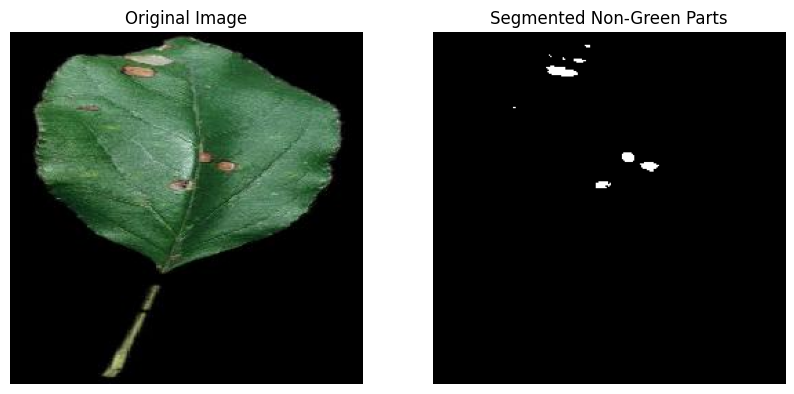

Total Pixel count of the leaf: 93330
Total Pixel count of the effected area: 313
Percentage of effected area on the leaf: 0.34%


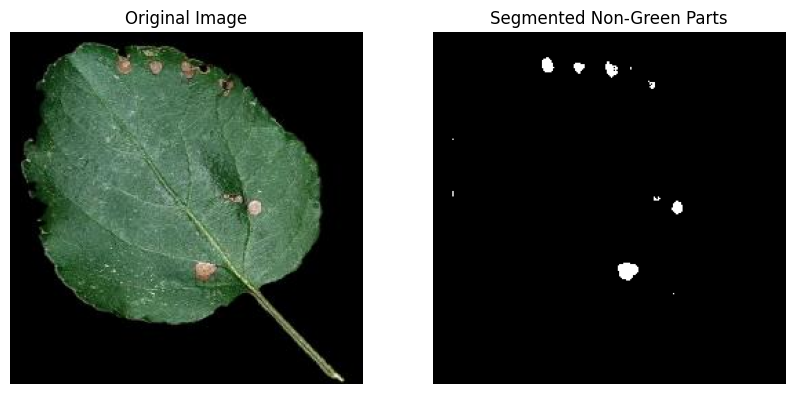

Total Pixel count of the leaf: 113225
Total Pixel count of the effected area: 419
Percentage of effected area on the leaf: 0.37%


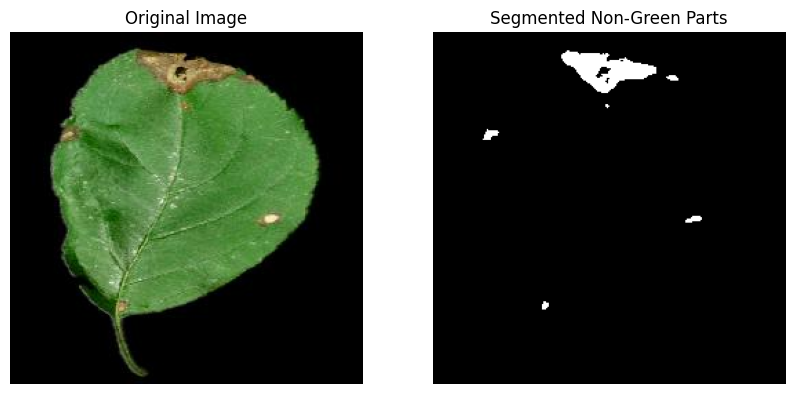

Total Pixel count of the leaf: 95287
Total Pixel count of the effected area: 1208
Percentage of effected area on the leaf: 1.27%


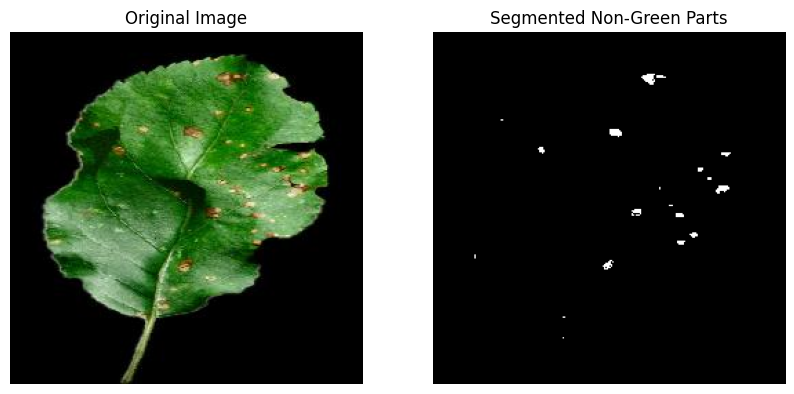

Total Pixel count of the leaf: 93552
Total Pixel count of the effected area: 306
Percentage of effected area on the leaf: 0.33%


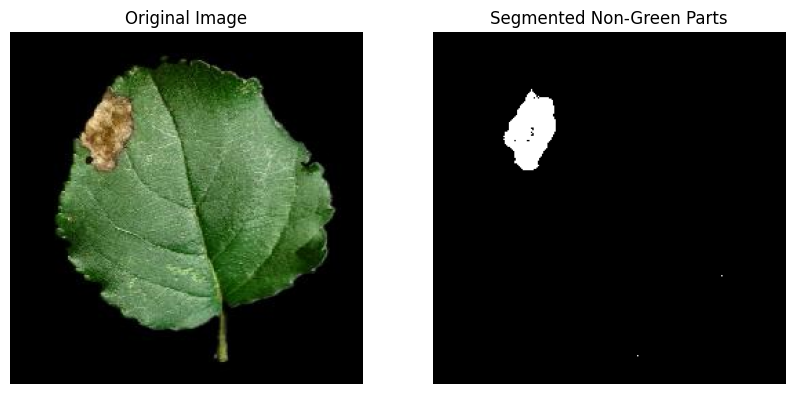

Total Pixel count of the leaf: 94753
Total Pixel count of the effected area: 1383
Percentage of effected area on the leaf: 1.46%


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters
import warnings
import random

warnings.filterwarnings("ignore", category=UserWarning, message=".*low contrast image.*")

def segment_non_green(input_directory, output_directory, batch_size=5):

    os.makedirs(output_directory, exist_ok=True)

    # Process each image
    image_dataset = []  # List to store input images
    mask_dataset = []  # List to store segmented masks

    # List all image files in the input directory
    image_files = [f for f in os.listdir(input_directory) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

    # Randomly select a batch of images
    selected_images = random.sample(image_files, min(batch_size, len(image_files)))

    # Process each randomly selected image
    for image_file in selected_images:
        # Load the image
        image_path = os.path.join(input_directory, image_file)
        original_image = io.imread(image_path)

        # Convert the image to HSV color space
        hsv_image = color.rgb2hsv(original_image)

        # Define a range for green color in the hue channel
        lower_green = 0.15  # Adjust as needed
        upper_green = 0.9  # Adjust as needed

        # Create a binary mask for green regions
        green_mask = np.logical_and(hsv_image[:, :, 0] >= lower_green, hsv_image[:, :, 0] <= upper_green)

        # Invert the binary mask to select non-green regions
        non_green_mask = ~green_mask

        # Apply the mask to the original image
        segmented_image = np.zeros_like(original_image)
        segmented_image[non_green_mask] = original_image[non_green_mask]

        # Convert the image to grayscale
        grayscale_image = color.rgb2gray(segmented_image)

        # Apply Otsu's thresholding
        threshold_value = filters.threshold_otsu(grayscale_image)
        binary_mask = (grayscale_image > threshold_value).astype(np.uint8)


        # Display the original and segmented images
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.imshow(original_image)
        plt.title("Original Image")
        plt.axis("off")

        plt.subplot(1, 2, 2)
        plt.imshow(binary_mask, cmap='gray')  # Display binary mask in grayscale
        plt.title("Segmented Non-Green Parts")
        plt.axis("off")

        plt.show()

        # Calculate and print non-zero pixel counts
        original_nonzero_count = np.count_nonzero(original_image)
        processed_nonzero_count = np.count_nonzero(binary_mask)

        print(f"Total Pixel count of the leaf: {original_nonzero_count}")
        print(f"Total Pixel count of the effected area: {processed_nonzero_count}")

        # Calculate the percentage
        percentage = (processed_nonzero_count / original_nonzero_count) * 100

        print(f"Percentage of effected area on the leaf: {percentage:.2f}%")



if __name__ == "__main__":
    input_directory = "/content/raw/segmented/Apple___Black_rot"
    output_directory = "/content/mask_Apple___Black_rot"
    batch_size = 5

    segment_non_green(input_directory, output_directory, batch_size)
